# Pandas Introduction 
Material referenced from Data 100, EEP 153 Spring 2020 Materials.

Learning Goals:
1. DataFrame & Series
2. Slicing, iloc, loc
3. Groupby
4. Joins & Merges
5. Problem Solving

Intro Pandas DataFrames
Pandas: Slicing & Indexing
Pandas: Aggregation
Python Visualizations

Pandas is a data analysis library/toolkit for Python. It is widely used in data science because it allows us to create objects called DataFrames that are just like tables and can be manipulated as such. These are basically rectangular arrays of data, with names for rows and columns, rather like a spreadsheet. In fact, one important thing one can do with DataFrames is to import data from spreadsheets. They also integrate well with NumPy arrays!

In [1]:
import pandas as pd
import numpy as np

## Intro to Pandas DataFrames

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for the pandas `DataFrame` class  provide at least two syntaxes to create a data frame.

Let's make our own DataFrame and learn to manipulate it. One way to make a DataFrame is to use pd.DataFrame and input the data manually, like below. Later, we'll show how to import Google Sheets or Excel files into DataFrames, which will be much more applicable in projects and assignments.

You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [2]:
my_recipe = pd.DataFrame(
    data={'ingredient': ['eggs', 'brown sugar', 'flour', 'vanilla', 'sugar', 'chocolate chips', 'baking soda', 'butter'],
          'price': [3.5, 2.99, 5.49, 5, 3.99, 2.99, 4.50, 5.00]
          })
my_recipe


,ingredient,price
0,eggs,3.50
1,brown sugar,2.99
2,flour,5.49
3,vanilla,5.00
4,sugar,3.99
5,chocolate chips,2.99
6,baking soda,4.50
7,butter,5.00


You can obtain the dimensions of a dataframe by using the shape attribute `dataframe.shape` in a tuple with (# of rows, # of columns).

In [3]:
my_recipe.shape

(8, 2)

You can also convert the entire dataframe into a two-dimensional numpy array using the `dataframe.values` for a DataFrame.

In [4]:
my_recipe.values

array([['eggs', 3.5],
       ['brown sugar', 2.99],
       ['flour', 5.49],
       ['vanilla', 5.0],
       ['sugar', 3.99],
       ['chocolate chips', 2.99],
       ['baking soda', 4.5],
       ['butter', 5.0]], dtype=object)

You can add a column to a dataframe very easily with `d['new column name']` = ... and assign a list or array of values to the column.

In [5]:
my_recipe['need to buy'] = [0,1,1,1,0,1,0,1]
my_recipe

,ingredient,price,need to buy
0,eggs,3.50,0
1,brown sugar,2.99,1
2,flour,5.49,1
3,vanilla,5.00,1
4,sugar,3.99,0
5,chocolate chips,2.99,1
6,baking soda,4.50,0
7,butter,5.00,1


You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. This way to modify an existing dataframe is faster and therefore preferred over the assignment syntax above. The first parameter is for the rows and second is for columns. The `:` means change all rows and the `new column name` indicates the column you are modifying (or in this case, adding). 


In [6]:
my_recipe.loc[:,'required for recipe'] = ['y', 'y', 'y','y', 'y', 'n', 'y', 'y']
my_recipe

,ingredient,price,need to buy,required for recipe
0,eggs,3.50,0,y
1,brown sugar,2.99,1,y
2,flour,5.49,1,y
3,vanilla,5.00,1,y
4,sugar,3.99,0,y
5,chocolate chips,2.99,1,n
6,baking soda,4.50,0,y
7,butter,5.00,1,y


You can use the `.drop()` method to [drop](https://pandas.pydata.org/pandasdocs/stable/generated/pandas.DataFrame.drop.html) to drop any columns you no longer need in your dataframe.

In [7]:
my_recipe = my_recipe.drop(columns = ['required for recipe'])
my_recipe

,ingredient,price,need to buy
0,eggs,3.50,0
1,brown sugar,2.99,1
2,flour,5.49,1
3,vanilla,5.00,1
4,sugar,3.99,0
5,chocolate chips,2.99,1
6,baking soda,4.50,0
7,butter,5.00,1


We can also use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) dataframe columns. Let's rename all our columns to be capitalized. 

In [10]:
my_recipe = my_recipe.rename(columns = {'ingredient': 'Ingredient', 'price': 'Price', 'need to buy':'Need to Buy'})
my_recipe

,Ingredient,Price,Need to Buy
0,eggs,3.50,0
1,brown sugar,2.99,1
2,flour,5.49,1
3,vanilla,5.00,1
4,sugar,3.99,0
5,chocolate chips,2.99,1
6,baking soda,4.50,0
7,butter,5.00,1


Beisdes DataFrames, another useful Pandas structure is a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). A Series is a type of list in Pandas which can take integer values, string values, and more that returns a Series object. It is different from a DataFrame, which is made up of multiple Series, while a single Series can only contain one list. Here's an example:

In [12]:
ingredient_series = my_recipe['Ingredient']
ingredient_series

0               eggs
1        brown sugar
2              flour
3            vanilla
4              sugar
5    chocolate chips
6        baking soda
7             butter
Name: Ingredient, dtype: object

As you can see, a Series is an object that is a list of values indexed from 0 to n. We can think of DataFrames as enhanced numpy 2D arrays (with better visual representation), and Series as enhanced numpy 1D arrays.

In [13]:
type(ingredient_series)

pandas.core.series.Series

## Pandas: Slicing and Indexing

Now, we're going to look at some school census data from https://ww2.amstat.org/censusatschool/. Pandas has the capability of reading data from different file formats (such as .csv, .xlsx, Google Sheets), so we can easily import any data that we download into the same folder as our code.

In [14]:
census = pd.read_csv('Example_CAStudents.csv', encoding= 'cp1252') #encoding parameter is not usually needed!
census.head()

,Country,Region,DataYear,ClassGrade,Gender,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
0,USA,CA,2010,12,Female,17.0,Right-Handed,162.6,22.9,153,...,20.0,0.0,10.0,A lot,Graduate degree,Reggae,Fly,Happy,Other,"Arts, culture, sports"
1,USA,CA,2014,12,Male,17.0,Right-Handed,181,26,178,...,3.0,0.0,1.0,Some,Graduate degree,Classical,Invisibility,Rich,Relative,Other
2,USA,CA,2015,6,Male,11.0,Right-Handed,178,28,185,...,1.0,2.0,1.0,Very little,Graduate degree,Techno/Electronic,Fly,Happy,Business person,International aid
3,USA,CA,2020,11,Female,17.0,Right-Handed,152,25.4,94.44,...,0.0,2.0,2.0,Very little,Other,Pop,Freeze time,Happy,Musician or singer,"Wildlife, animals"
4,USA,CA,2016,7,Female,12.0,Right-Handed,158,23,145,...,2.0,0.0,1.0,Very little,Graduate degree,Rock and roll,Freeze time,Rich,Other,"Wildlife, animals"


Let's examine the size of the dataset and see what we are working with in this dataframe.

In [15]:
census.shape
#We have 500 rows (500 individual student entries) and 60 columns

(500, 60)

Let's get a list of all 60 columns in the dataset.

In [16]:
census.columns

Index(['Country', 'Region', 'DataYear', 'ClassGrade', 'Gender', 'Ageyears',
       'Handed', 'Height_cm', 'Footlength_cm', 'Armspan_cm',
       'Languages_spoken', 'Travel_to_School', 'Travel_time_to_School',
       'Reaction_time', 'Score_in_memory_game', 'Favourite_physical_activity',
       'Importance_reducing_pollution', 'Importance_recycling_rubbish',
       'Importance_conserving_water', 'Importance_saving_energy',
       'Importance_owning_computer', 'Importance_Internet_access',
       'Left_Footlength_cm', 'Longer_foot', 'Index_Fingerlength_mm',
       'Ring_Fingerlength_mm', 'Longer_Finger_Lefthand', 'Birth_month',
       'Favorite_Season', 'Allergies', 'Vegetarian', 'Favorite_Food',
       'Beverage', 'Favorite_School_Subject', 'Sleep_Hours_Schoolnight',
       'Sleep_Hours_Non_Schoolnight', 'Home_Occupants', 'Home_Internet_Access',
       'Communication_With_Friends', 'Text_Messages_Sent_Yesterday',
       'Text_Messages_Received_Yesterday', 'Hanging_Out_With_Friends_Hours

We can select a specific column in the dataset using its column name.

In [17]:
census['DataYear'] 
census.DataYear.head()

0    2010
1    2014
2    2015
3    2020
4    2016
Name: DataYear, dtype: int64

Series have a nice function called [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) that returns a series listing the number of times each value appears in the series.

In [18]:
census['DataYear'].value_counts()

2015    80
2016    77
2018    67
2019    61
2017    50
2014    42
2020    39
2013    26
2011    25
2012    23
2010    10
Name: DataYear, dtype: int64

Oftentimes, we need to slice the dataframe to obtain smaller subsets of the table to analyze. This can be accomplished by using label (loc) or index (iloc).

### Selection Using Label/Index (using loc)

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. (Reminder that the colon `:` means "everything.")  For example, if we want the `color` column of the `ex` data frame, we would use: `ex.loc[:, 'color']`

- You can also slice across columns. For example, `census.loc[:, 'Gender':]` would select the column `Gender` and all columns after `Gender`.

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [19]:
census.loc[1:5, 'Gender']

1      Male
2      Male
3    Female
4    Female
5    Female
Name: Gender, dtype: object

To get a single column, you can just pass in that column name and it will return a Series. If you need multiple columns or to return a dataframe, you must put the column parameneter in a list.

In [21]:
census.loc[1:5, ['Gender']]

,Gender
1,Male
2,Male
3,Female
4,Female
5,Female


In [22]:
census.loc[1:5, ['Gender', 'Height_cm']]

,Gender,Height_cm
1,Male,181
2,Male,178
3,Female,152
4,Female,158
5,Female,170


### Selection using Integer location (using iloc)

Pandas has another feature `iloc[]` which lets you slice the dataframe by row position and column position instead of by row index and column label (which is the case for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

Note that when you sort or rearrange the dataframe, the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [23]:
sorted_census = census.sort_values(by = ['ClassGrade'])
sorted_census.head()

,Country,Region,DataYear,ClassGrade,Gender,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
488,USA,CA,2016,4,Male,7.0,Right-Handed,120,20,120,...,8.0,0.0,1.0,Some,Undergraduate degree,Pop,Telepathy,Healthy,Sports person,Environment
288,USA,CA,2016,4,Male,8.0,Right-Handed,120,18,120,...,2.0,0.0,3.5,Very little,Graduate degree,Classical,Invisibility,Happy,Other,Health
70,USA,CA,2015,4,Female,7.0,Right-Handed,113,16,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,USA,CA,2016,4,Female,16.0,Right-Handed,170,24,160,...,0.0,0.0,4.0,A lot,Graduate degree,Punk rock,Fly,Happy,Doctor or nurse,International aid
441,USA,CA,2016,4,Male,8.0,Right-Handed,125,19,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Gender` column of the `census` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting by `ClassGrade`.

In [24]:
sorted_census.iloc[1:4, 3]

288    4
70     4
495    4
Name: ClassGrade, dtype: int64

In [25]:
sorted_census.iloc[1:4, :6]

,Country,Region,DataYear,ClassGrade,Gender,Ageyears
288,USA,CA,2016,4,Male,8.0
70,USA,CA,2015,4,Female,7.0
495,USA,CA,2016,4,Female,16.0


Lastly, we can change the index of a dataframe using the [set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) method.

In [26]:
change_index = census.set_index('Gender')
change_index.head()

,Country,Region,DataYear,ClassGrade,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,Languages_spoken,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
Gender,,,,,,,,,,,,,,,,,,,,,
Female,USA,CA,2010,12,17.0,Right-Handed,162.6,22.9,153,1.0,...,20.0,0.0,10.0,A lot,Graduate degree,Reggae,Fly,Happy,Other,"Arts, culture, sports"
Male,USA,CA,2014,12,17.0,Right-Handed,181,26,178,2.0,...,3.0,0.0,1.0,Some,Graduate degree,Classical,Invisibility,Rich,Relative,Other
Male,USA,CA,2015,6,11.0,Right-Handed,178,28,185,1.0,...,1.0,2.0,1.0,Very little,Graduate degree,Techno/Electronic,Fly,Happy,Business person,International aid
Female,USA,CA,2020,11,17.0,Right-Handed,152,25.4,94.44,1.0,...,0.0,2.0,2.0,Very little,Other,Pop,Freeze time,Happy,Musician or singer,"Wildlife, animals"
Female,USA,CA,2016,7,12.0,Right-Handed,158,23,145,1.0,...,2.0,0.0,1.0,Very little,Graduate degree,Rock and roll,Freeze time,Rich,Other,"Wildlife, animals"


### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  To clean data, you will have to filter your data at some point: whether it be for clearing up cases with missing values, taking out outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

Some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In [27]:
#Select the rows of the Dataframe where DataYear = 2020
census2020 = census[census['DataYear'] == 2020]
census2020.head()

,Country,Region,DataYear,ClassGrade,Gender,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
3,USA,CA,2020,11,Female,17.0,Right-Handed,152,25.4,94.44,...,0.0,2.0,2.0,Very little,Other,Pop,Freeze time,Happy,Musician or singer,"Wildlife, animals"
5,USA,CA,2020,12,Female,17.0,Right-Handed,170,25cm,168,...,2.0,3.0,4.0,A lot,Undergraduate degree,Rhythm and blues (R&B),Fly,Healthy,Relative,Environment
12,USA,CA,2020,12,Female,17.0,Ambidextrous,5'0,34,85,...,100.0,0.0,2.0,Some,Graduate degree,Pop,Telepathy,Rich,Other,Environment
18,USA,CA,2020,12,Female,17.0,Right-Handed,162,26,164,...,0.0,6.0,0.0,A lot,Some college,Pop,Telepathy,Rich,Actor,"Wildlife, animals"
24,USA,CA,2020,12,Male,17.0,Left-Handed,154,24,182,...,1.0,0.0,0.0,Some,Graduate degree,Rap/Hip hop,Super strength,Healthy,Sports person,"Arts, culture, sports"


You can also put multiple conditions together. Any time you use `p & q` to filter the dataframe, make sure to use `df[df[(p) & (q)]]` or `df.loc[df[(p) & (q)]])`. That is, make sure to wrap conditions with parentheses.

**Remember** that both slicing and `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

In [28]:
#Select the rows where DataYear = 2020 and Female
census_2020_f = census[(census['DataYear'] == 2020) & (census['Gender'] == 'Female')]
census_2020_f.head()

,Country,Region,DataYear,ClassGrade,Gender,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
3,USA,CA,2020,11,Female,17.0,Right-Handed,152,25.4,94.44,...,0.0,2.0,2.0,Very little,Other,Pop,Freeze time,Happy,Musician or singer,"Wildlife, animals"
5,USA,CA,2020,12,Female,17.0,Right-Handed,170,25cm,168,...,2.0,3.0,4.0,A lot,Undergraduate degree,Rhythm and blues (R&B),Fly,Healthy,Relative,Environment
12,USA,CA,2020,12,Female,17.0,Ambidextrous,5'0,34,85,...,100.0,0.0,2.0,Some,Graduate degree,Pop,Telepathy,Rich,Other,Environment
18,USA,CA,2020,12,Female,17.0,Right-Handed,162,26,164,...,0.0,6.0,0.0,A lot,Some college,Pop,Telepathy,Rich,Actor,"Wildlife, animals"
56,USA,CA,2020,12,Female,17.0,Right-Handed,165.1,24,149.9,...,2.0,NaN,7.0,Some,Undergraduate degree,Pop,Telepathy,Happy,Other,Health


## Pandas: Aggregation

In [ ]:
census_q = census.loc[:, ['Ageyears', 'ClassGrade', 'Languages_spoken']]
census_q.head()

### Dataframe Aggregation
When you first come across a large dataset, the best way to get a sense of it is to get summary statistics. The [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) allows you to do this. Using `df.aggregate()` directly on the whole dataframe will apply the aggregation functions on the entire dataframe at once.

Some common built-in Pandas aggregations are provided below:

Aggregation | Description 
------ | ---------- 
`count()`   | Total number of items
`first()`   | First and last item
`mean(), median()`   | Mean and median
`min(), max()`   | Minimum and maximum
`std(), var()`   | Standard deviation and variance
`mad()`   | Mean absolute deviation
`prod()`   | Product of all items
`sum()`   | Sum of all items


In [ ]:
census_q.aggregate(['min', 'mean'])

In [ ]:
#You can also specify different aggregations for each column
census_q.aggregate({'Ageyears': ['std', 'mean'], 'ClassGrade': ['median', 'var'], 'Languages_spoken': ['max']})

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) operation. When you first apply `groupby()` to a dataframe, it returns a groupby object.

In [ ]:
census.groupby('ClassGrade')

From there, you can specify how you want to aggregate the rows of the Groupby object.

In [ ]:
census.groupby('ClassGrade').agg(sum)

As you can see, the agggregation is then applied to each column that the aggregation function can be used on. `sum` can only be applied on integers and floats, so it omits and columns that have other datatypes.

In [ ]:
census.groupby('ClassGrade').agg(list).head()

## Visualizations

After exploring your dataset, it's important to be able to represent it visually. `matplotlib.pyplot` is a library that allows you to make basic visualizations. Later in the course, we will explore more advanced libraries to create more complex visualizations.

In [29]:
import matplotlib as plt

In [30]:
#Age and foot length for all males in the census dataframe
census_af = census[census['Gender'] == 'Male'].loc[:,['Ageyears', 'Footlength_cm']]
census_af['Footlength_cm'] = pd.to_numeric(census_af['Footlength_cm'])
census_af.head()

,Ageyears,Footlength_cm
1,17.0,26.0
2,11.0,28.0
8,17.0,25.0
11,18.0,189.0
13,15.0,27.0


You can create a plot directly from the dataframe with the [plt.plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) by specifying the columns that are to be used for the x and y axes.

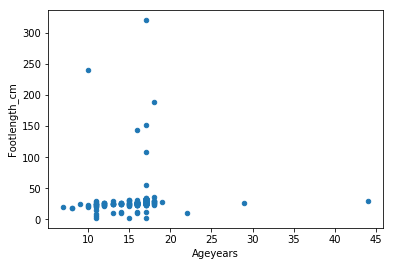

In [33]:
census_af.plot(x = 'Ageyears', y = 'Footlength_cm', kind = 'scatter')